In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory, image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from tkinter import filedialog


# Ścieżka do folderu z danymi
dataset_path = r'C:\Users\filib\Desktop\AI\Brain Tumor Data Set\Brain Tumor Data Set'

# Wczytywanie i przetwarzanie danych
train_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

validation_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)




Found 4514 files belonging to 2 classes.
Using 3612 files for training.
Found 4514 files belonging to 2 classes.
Using 902 files for validation.


In [28]:
# Normalizacja danych
normalization_layer = layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))

In [29]:
# Budowa modelu
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
# Trenowanie modelu
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10
)

Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 475s 4s/step - accuracy: 0.5849 - loss: 0.7305 - val_accuracy: 0.7007 - val_loss: 0.6046
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.6803 - loss: 0.6039 - val_accuracy: 0.7007 - val_loss: 0.5795
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.7172 - loss: 0.5820 - val_accuracy: 0.6885 - val_loss: 0.5808
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.7063 - loss: 0.5771 - val_accuracy: 0.7084 - val_loss: 0.5669
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.7196 - loss: 0.5645 - val_accuracy: 0.7273 - val_loss: 0.5551
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.7249 - loss: 0.5676 - val_accuracy: 0.7295 - val_loss: 0.5668
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.7207 - loss: 0.5676 - val_accuracy: 0.7262 - val_loss: 0.5498
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.7321 - loss: 0.5401 - val_accu

29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 910ms/step - accuracy: 0.7279 - loss: 0.5428
Loss: 0.5311002731323242
Accuracy: 0.7283813953399658


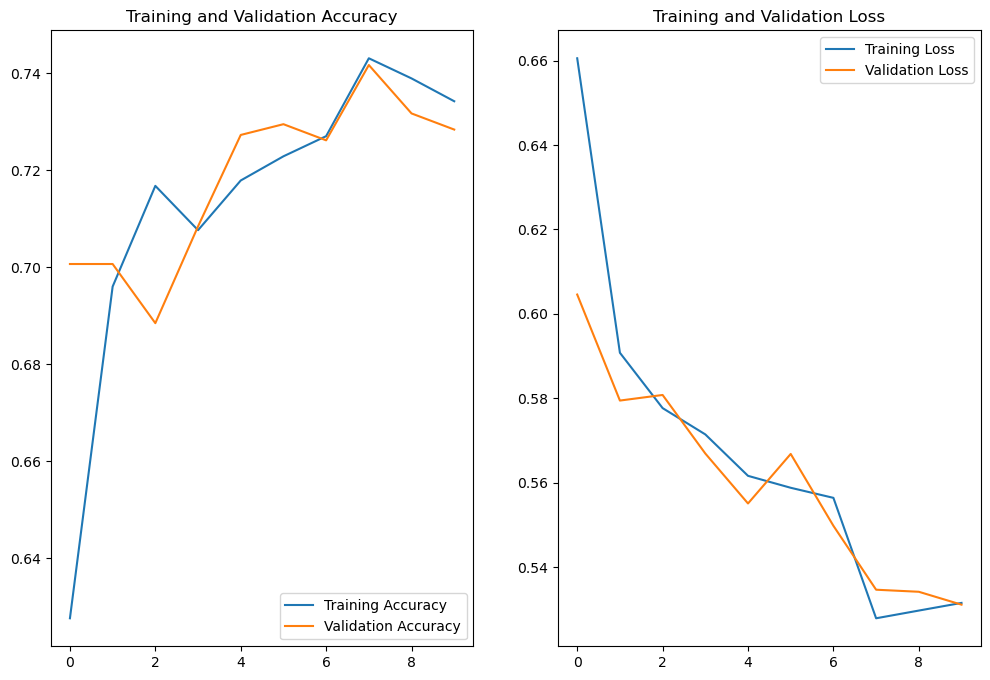

In [31]:
# Ewaluacja modelu
loss, accuracy = model.evaluate(validation_dataset)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

# Wizualizacja wyników trenowania
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
# Zapisanie modelu
model.save('braincheck33.h5')

In [32]:
# Ładowanie modelu
from keras.models import load_model
model = load_model('braincheck33.h5')


In [34]:
 #Funkcja do przetwarzania obrazu
def image_preprocessing(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalizacja
    return img_array

# Funkcja do otwierania okna dialogowego
def open_file_dialog():
    root = tk.Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename()
    return file_path
# Klasyfikacja obrazu
img_path = open_file_dialog()
if img_path:
    img = image_preprocessing(img_path)
    prediction = model.predict(img)
    print(f"Prediction raw output: {prediction}")
    predicted_class = np.argmax(prediction, axis=1)
    if predicted_class == 0:
        print("Class: Brain Tumor")
    else:
        print("Class: Healthy")
else:
    print("No file selected.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Prediction raw output: [[0.63069975 0.36930025]]
Class: Brain Tumor
